In [1]:
import pandas as pd
data= pd.read_csv('data.csv')
print(data)

         ticker        date        last    volume
0       1332 JT  2013-01-04    169.0987   1464100
1       1332 JT  2013-01-07    166.3266   1783500
2       1332 JT  2013-01-08    166.3266   1759800
3       1332 JT  2013-01-09    165.4026    767800
4       1332 JT  2013-01-10    167.2507   1503100
...         ...         ...         ...       ...
451108  9984 JT  2021-03-15  10370.0000  12041200
451109  9984 JT  2021-03-16  10620.0000  11346000
451110  9984 JT  2021-03-17  10400.0000   9771000
451111  9984 JT  2021-03-18  10220.0000  13941600
451112  9984 JT  2021-03-19   9969.0000  20715700

[451113 rows x 4 columns]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
print(data["ticker"].unique())

['1332 JT' '1333 JT' '1334 JT' '1605 JT' '1721 JT' '1801 JT' '1802 JT'
 '1803 JT' '1808 JT' '1812 JT' '1925 JT' '1928 JT' '1963 JT' '2002 JT'
 '2269 JT' '2282 JT' '2413 JT' '2432 JT' '2501 JT' '2502 JT' '2503 JT'
 '2531 JT' '2768 JT' '2801 JT' '2802 JT' '2871 JT' '2914 JT' '3086 JT'
 '3099 JT' '3101 JT' '3103 JT' '3105 JT' '3110 JT' '3289 JT' '3382 JT'
 '3401 JT' '3402 JT' '3405 JT' '3407 JT' '3436 JT' '3659 JT' '3861 JT'
 '3863 JT' '3864 JT' '3865 JT' '3893 JT' '4004 JT' '4005 JT' '4021 JT'
 '4041 JT' '4042 JT' '4043 JT' '4061 JT' '4063 JT' '4151 JT' '4183 JT'
 '4188 JT' '4208 JT' '4272 JT' '4324 JT' '4452 JT' '4502 JT' '4503 JT'
 '4506 JT' '4507 JT' '4519 JT' '4523 JT' '4543 JT' '4568 JT' '4578 JT'
 '4631 JT' '4689 JT' '4704 JT' '4751 JT' '4755 JT' '4901 JT' '4902 JT'
 '4911 JT' '5002 JT' '5019 JT' '5020 JT' '5101 JT' '5108 JT' '5201 JT'
 '5202 JT' '5214 JT' '5232 JT' '5233 JT' '5301 JT' '5332 JT' '5333 JT'
 '5401 JT' '5406 JT' '5411 JT' '5413 JT' '5541 JT' '5631 JT' '5703 JT'
 '5706

In [3]:
stock1=data.loc[data["ticker"]=="1332 JT"]
stock2=data.loc[data["ticker"]=="1333 JT"]
stock3=data.loc[data["ticker"]=="9984 JT"]
print(stock1)
stock1.count()

       ticker        date      last   volume
0     1332 JT  2013-01-04  169.0987  1464100
1     1332 JT  2013-01-07  166.3266  1783500
2     1332 JT  2013-01-08  166.3266  1759800
3     1332 JT  2013-01-09  165.4026   767800
4     1332 JT  2013-01-10  167.2507  1503100
...       ...         ...       ...      ...
2000  1332 JT  2021-03-15  560.0000  1537500
2001  1332 JT  2021-03-16  559.0000  1594200
2002  1332 JT  2021-03-17  561.0000  1328200
2003  1332 JT  2021-03-18  565.0000  1421200
2004  1332 JT  2021-03-19  567.0000  2197500

[2005 rows x 4 columns]


ticker    2005
date      2005
last      2005
volume    2005
dtype: int64

Text(0.5, 1.0, 'Stock Prices of 1332 JT')

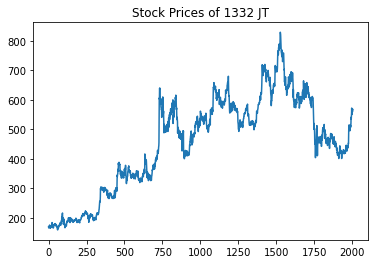

In [4]:
plt.plot(list(range(len(stock1))),stock1["last"])
plt.title("Stock Prices of 1332 JT")

In [5]:
import datetime
import time
ticker = "1332 JT"
start_time = datetime.datetime(2013, 1, 4)
df = stock1

In [6]:
def computeMACD (df, n_fast, n_slow, n_smooth):
    data = df["last"]
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)
    return df

In [7]:
df = computeMACD(df, 12, 26, 9)

In [8]:
print(df.head())
print(df.tail())

    ticker        date      last   volume  MACD  MACDsig  MACDhist
0  1332 JT  2013-01-04  169.0987  1464100   NaN      NaN       NaN
1  1332 JT  2013-01-07  166.3266  1783500   NaN      NaN       NaN
2  1332 JT  2013-01-08  166.3266  1759800   NaN      NaN       NaN
3  1332 JT  2013-01-09  165.4026   767800   NaN      NaN       NaN
4  1332 JT  2013-01-10  167.2507  1503100   NaN      NaN       NaN
       ticker        date   last   volume       MACD    MACDsig  MACDhist
2000  1332 JT  2021-03-15  560.0  1537500  23.118042  22.033065  1.084978
2001  1332 JT  2021-03-16  559.0  1594200  22.640416  22.154535  0.485881
2002  1332 JT  2021-03-17  561.0  1328200  22.167740  22.157176  0.010564
2003  1332 JT  2021-03-18  565.0  1421200  21.863875  22.098516 -0.234641
2004  1332 JT  2021-03-19  567.0  2197500  21.536187  21.986050 -0.449863


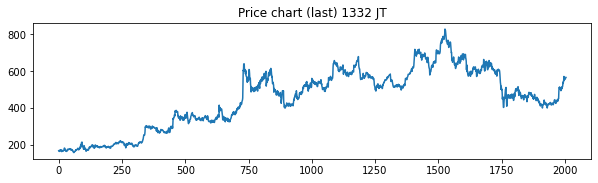

In [9]:
# plot price
plt.figure(figsize=(10,2.5))
plt.plot(list(range(len(df))),df['last'])
plt.title('Price chart (last) ' + str(ticker))
plt.show()

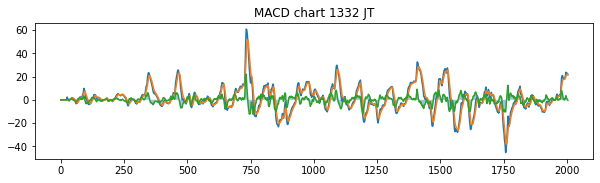

In [10]:
# plot correspondingRSI values and significant levels
plt.figure(figsize=(10,2.5))
plt.title('MACD chart ' + str(ticker))
plt.plot(list(range(len(df))), df['MACD'].fillna(0))
plt.plot(list(range(len(df))), df['MACDsig'].fillna(0))
plt.plot(list(range(len(df))), df['MACDhist'].fillna(0))
plt.bar(list(range(len(df))), df['MACDhist'].fillna(0), width=0.5, snap=False)
plt.show()

In [11]:
def generate_signals(df):
    buy = []
    sell = []
    flag = -1
    
    for i in range(0,len(df)):
        if df['MACD'][i] > df['MACDsig'][i]:         
            sell.append(np.nan)                 
            if flag != 1:                            
                buy.append(df['last'][i])      
                flag = 1
            else:
                buy.append(np.nan)
        elif df['MACD'][i] < df['MACDsig'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(df['last'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return (buy, sell)    

# create indicator of buy or sell
signal = generate_signals(df)
df['buy_sig'] = signal[0]
df['sell_sig'] = signal[1]

In [12]:
df

,ticker,date,last,volume,MACD,MACDsig,MACDhist,buy_sig,sell_sig
0,1332 JT,2013-01-04,169.0987,1464100,NaN,NaN,NaN,NaN,NaN
1,1332 JT,2013-01-07,166.3266,1783500,NaN,NaN,NaN,NaN,NaN
2,1332 JT,2013-01-08,166.3266,1759800,NaN,NaN,NaN,NaN,NaN
3,1332 JT,2013-01-09,165.4026,767800,NaN,NaN,NaN,NaN,NaN
4,1332 JT,2013-01-10,167.2507,1503100,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2000,1332 JT,2021-03-15,560.0000,1537500,23.118042,22.033065,1.084978,NaN,NaN
2001,1332 JT,2021-03-16,559.0000,1594200,22.640416,22.154535,0.485881,NaN,NaN
2002,1332 JT,2021-03-17,561.0000,1328200,22.167740,22.157176,0.010564,NaN,NaN
2003,1332 JT,2021-03-18,565.0000,1421200,21.863875,22.098516,-0.234641,NaN,565.0


In [13]:
def plot_signals(df, ticker):
    # plot price
    plt.figure(figsize=(15,5))
    plt.plot(list(range(len(df))), df['last'])
    plt.title('Price chart (last) ' + str(ticker))
    plt.show()

    # plot  values and significant levels
    plt.figure(figsize=(15,5))
    plt.title('Bollinger Bands chart ' + str(ticker))
    plt.plot(list(range(len(df))), df['last'], label='last', color='blue', alpha=0.3)
    plt.scatter(list(range(len(df))), df['buy_sig'], label='Buy', marker='^')
    plt.scatter(list(range(len(df))), df['sell_sig'], label='Sell', marker='v')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,5))
    plt.title('MACD chart ' + str(ticker))
    plt.plot(list(range(len(df))), df['MACD'].fillna(0))
    plt.plot(list(range(len(df))), df['MACDsig'].fillna(0))
    plt.plot(list(range(len(df))), df['MACDhist'].fillna(0))
    plt.bar(list(range(len(df))), df['MACDhist'].fillna(0), width=0.5, snap=False)
    
    return None

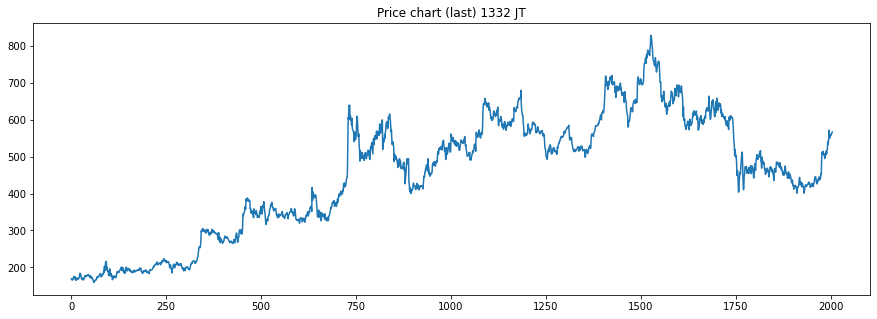

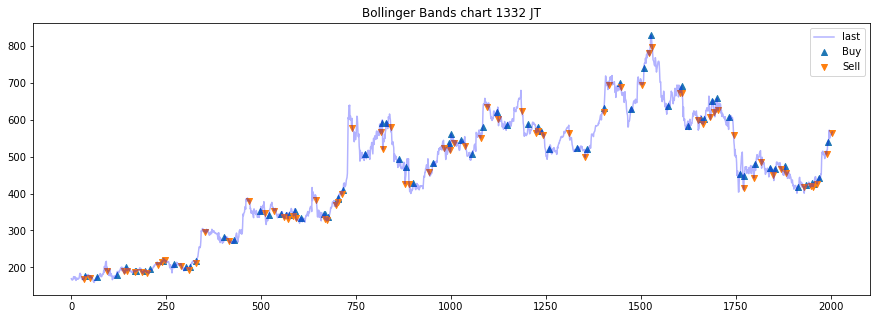

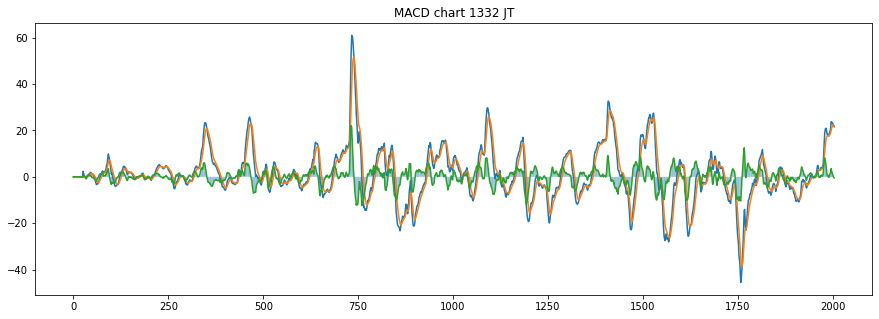

In [14]:
plot_signals(df, ticker)

In [ ]:
from typing import List, TYPE_CHECKING, Union
from ._util import _data_period
if TYPE_CHECKING:
    from .backtesting import Strategy, Trade
def compute_drawdown_duration_peaks(dd: pd.Series):
    iloc = np.unique(np.r_[(dd == 0).values.nonzero()[0], len(dd) - 1])
    iloc = pd.Series(iloc, index=dd.index[iloc])
    df = iloc.to_frame('iloc').assign(prev=iloc.shift())
    df = df[df['iloc'] > df['prev'] + 1].astype(int)

    # If no drawdown since no trade, avoid below for pandas sake and return nan series
    if not len(df):
        return (dd.replace(0, np.nan),) * 2

    df['duration'] = df['iloc'].map(dd.index.__getitem__) - df['prev'].map(dd.index.__getitem__)
    df['peak_dd'] = df.apply(lambda row: dd.iloc[row['prev']:row['iloc'] + 1].max(), axis=1)
    df = df.reindex(dd.index)
    return df['duration'], df['peak_dd']

def geometric_mean(returns: pd.Series) -> float:
    returns = returns.fillna(0) + 1
    if np.any(returns <= 0):
        return 0
    return np.exp(np.log(returns).sum() / (len(returns) or np.nan)) - 1

def compute_stats(
        trades: Union[List['Trade'], pd.DataFrame],
        equity: np.ndarray,
        ohlc_data: pd.DataFrame,
        strategy_instance: 'Strategy',
        risk_free_rate: float = 0,
) -> pd.Series:
    assert -1 < risk_free_rate < 1

    index = ohlc_data.index
    dd = 1 - equity / np.maximum.accumulate(equity)
    dd_dur, dd_peaks = compute_drawdown_duration_peaks(pd.Series(dd, index=index))

    equity_df = pd.DataFrame({
        'Equity': equity,
        'DrawdownPct': dd,
        'DrawdownDuration': dd_dur},
        index=index)

    if isinstance(trades, pd.DataFrame):
        trades_df = trades
    else:
        # Came straight from Backtest.run()
        trades_df = pd.DataFrame({
            'Size': [t.size for t in trades],
            'EntryBar': [t.entry_bar for t in trades],
            'ExitBar': [t.exit_bar for t in trades],
            'EntryPrice': [t.entry_price for t in trades],
            'ExitPrice': [t.exit_price for t in trades],
            'PnL': [t.pl for t in trades],
            'ReturnPct': [t.pl_pct for t in trades],
            'EntryTime': [t.entry_time for t in trades],
            'ExitTime': [t.exit_time for t in trades],
        })
        trades_df['Duration'] = trades_df['ExitTime'] - trades_df['EntryTime']
    del trades

    pl = trades_df['PnL']
    returns = trades_df['ReturnPct']
    durations = trades_df['Duration']

    def _round_timedelta(value, _period=_data_period(index)):
        if not isinstance(value, pd.Timedelta):
            return value
        resolution = getattr(_period, 'resolution_string', None) or _period.resolution
        return value.ceil(resolution)

    s = pd.Series(dtype=object)
    s.loc['Start'] = index[0]
    s.loc['End'] = index[-1]
    s.loc['Duration'] = s.End - s.Start

    have_position = np.repeat(0, len(index))
    for t in trades_df.itertuples(index=False):
        have_position[t.EntryBar:t.ExitBar + 1] = 1

    s.loc['Exposure Time [%]'] = have_position.mean() * 100  # In "n bars" time, not index time
    s.loc['Equity Final [$]'] = equity[-1]
    s.loc['Equity Peak [$]'] = equity.max()
    s.loc['Return [%]'] = (equity[-1] - equity[0]) / equity[0] * 100
    c = ohlc_data.Close.values
    s.loc['Buy & Hold Return [%]'] = (c[-1] - c[0]) / c[0] * 100  # long-only return

    gmean_day_return: float = 0
    day_returns = np.array(np.nan)
    annual_trading_days = np.nan
    if isinstance(index, pd.DatetimeIndex):
        day_returns = equity_df['Equity'].resample('D').last().dropna().pct_change()
        gmean_day_return = geometric_mean(day_returns)
        annual_trading_days = float(
            365 if index.dayofweek.to_series().between(5, 6).mean() > 2/7 * .6 else
            252)

    # Annualized return and risk metrics are computed based on the (mostly correct)
    # annualized return matches `empyrical.annual_return(day_returns)` whereas
    # risk doesn't; they use the simpler approach below.
    annualized_return = (1 + gmean_day_return)**annual_trading_days - 1
    s.loc['Return (Ann.) [%]'] = annualized_return * 100
    s.loc['Volatility (Ann.) [%]'] = np.sqrt((day_returns.var(ddof=int(bool(day_returns.shape))) + (1 + gmean_day_return)**2)**annual_trading_days - (1 + gmean_day_return)**(2*annual_trading_days)) * 100  # noqa: E501
    # s.loc['Return (Ann.) [%]'] = gmean_day_return * annual_trading_days * 100
    # s.loc['Risk (Ann.) [%]'] = day_returns.std(ddof=1) * np.sqrt(annual_trading_days) * 100
    # Sharpe mismatches `empyrical.sharpe_ratio()` because they use arithmetic mean return
    # and simple standard deviation
    s.loc['Sharpe Ratio'] = np.clip((s.loc['Return (Ann.) [%]'] - risk_free_rate) / (s.loc['Volatility (Ann.) [%]'] or np.nan), 0, np.inf)  # noqa: E501
    # Sortino mismatches `empyrical.sortino_ratio()` because they use arithmetic mean return
    s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
    max_dd = -np.nan_to_num(dd.max())
    s.loc['Calmar Ratio'] = np.clip(annualized_return / (-max_dd or np.nan), 0, np.inf)
    s.loc['Max. Drawdown [%]'] = max_dd * 100
    s.loc['Avg. Drawdown [%]'] = -dd_peaks.mean() * 100
    s.loc['Max. Drawdown Duration'] = _round_timedelta(dd_dur.max())
    s.loc['Avg. Drawdown Duration'] = _round_timedelta(dd_dur.mean())
    s.loc['# Trades'] = n_trades = len(trades_df)
    s.loc['Win Rate [%]'] = np.nan if not n_trades else (pl > 0).sum() / n_trades * 100  # noqa: E501
    s.loc['Best Trade [%]'] = returns.max() * 100
    s.loc['Worst Trade [%]'] = returns.min() * 100
    mean_return = geometric_mean(returns)
    s.loc['Avg. Trade [%]'] = mean_return * 100
    s.loc['Max. Trade Duration'] = _round_timedelta(durations.max())
    s.loc['Avg. Trade Duration'] = _round_timedelta(durations.mean())
    s.loc['Profit Factor'] = returns[returns > 0].sum() / (abs(returns[returns < 0].sum()) or np.nan)  # noqa: E501
    s.loc['Expectancy [%]'] = returns.mean() * 100
    s.loc['SQN'] = np.sqrt(n_trades) * pl.mean() / (pl.std() or np.nan)
    s.loc['_strategy'] = strategy_instance
    s.loc['_equity_curve'] = equity_df
    s.loc['_trades'] = trades_df
    s = _Stats(s)
    return s


class _Stats(pd.Series):
    def __repr__(self):
        with pd.option_context('max_colwidth', 20):
            return super().__repr__()